In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import pdet
import fpfs
import fitsio
import numpy as np
from fpfs import pltutil
import matplotlib.pylab as plt
import numpy.lib.recfunctions as rfn

ver='try2'
gver='basic2'
dver='cut16'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')

In [3]:
#nver='var1em9' # 'var0em0'#
nver='var7em3' # 'var0em0'#
#nver='var0em0' # 'var0em0'#
# read noiseless data
mm1=[]
mm2=[]
for _i in range(1000):
    _a1=fitsio.read(os.path.join(simDir,'srcfs3_%sShift-%s_%s/psf60/fpfs-%s-%04d-g1-0000.fits' %(gver,nver,ver,dver,_i)))
    _a2=fitsio.read(os.path.join(simDir,'srcfs3_%sShift-%s_%s/psf60/fpfs-%s-%04d-g1-2222.fits' %(gver,nver,ver,dver,_i)))
    mm1.append(_a1)
    mm2.append(_a2)
    del _a1,_a2#,msk1,msk2
mm1 =   rfn.stack_arrays(mm1,usemask=False)
mm2 =   rfn.stack_arrays(mm2,usemask=False)
gc.collect()

243

In [4]:
gc.collect()
Const  =   6e-2
noirev =   True
ellM1  =   fpfs.catutil.fpfsM2E(mm1,const=Const,noirev=noirev)
ellM2  =   fpfs.catutil.fpfsM2E(mm2,const=Const,noirev=noirev)
gc.collect()

0

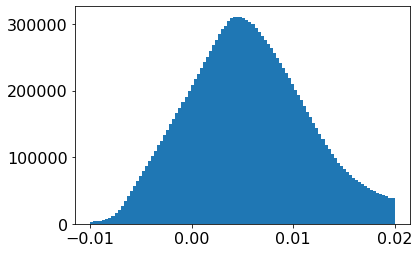

In [5]:
plt.close()
_=plt.hist(mm1['fpfs_v1'],range=(-0.01,0.02),bins=100)

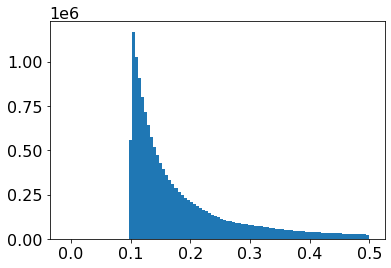

In [6]:
plt.close()
_=plt.hist(mm1['fpfs_M00'],range=(-0.01,0.5),bins=100)

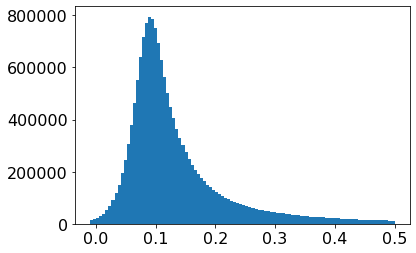

In [7]:
plt.close()
_=plt.hist(-mm1['fpfs_M20'],range=(-0.01,0.5),bins=100)

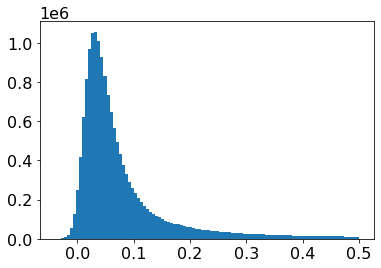

In [8]:
plt.close()
_=plt.hist(mm1['fpfs_M00']+mm1['fpfs_M20'],range=(-0.04,0.5),bins=100)

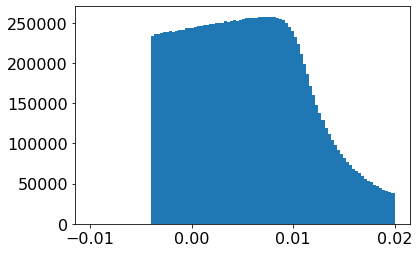

In [9]:
plt.close()
_=plt.hist(mm1['fpfs_v0'],range=(-0.01,0.02),bins=100)

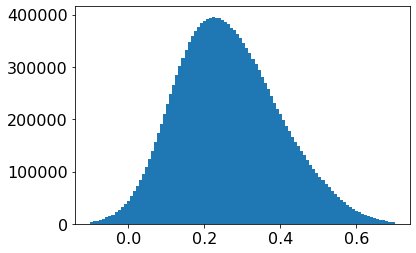

In [10]:
plt.close()
_=plt.hist(ellM1['fpfs_R1E'],range=(-0.1,0.7),bins=100)

In [7]:
gc.collect()

8714

0.0
0.06
0.12
0.18
0.24
0.3
0.36
0.42


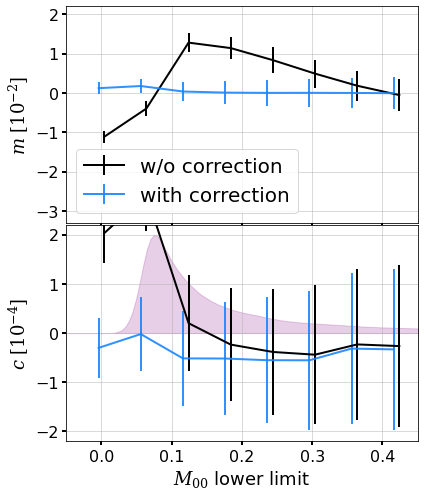

In [32]:
if True:
    del fs1,fs2
gc.collect()
use_sig=False
fs1=fpfs.base.Summary(mm1,ellM1,use_sig)
fs2=fpfs.base.Summary(mm2,ellM2,use_sig)

selnm=['R2']
dcc=0.06 # delta cut
cutB=0.
cutsig=[0.08]

x=[]
y1=[];y2=[];yerr=[]
z1=[];z2=[];zerr=[]
for i in range(0,8):
    # clean outcome
    fs1.clear_outcomes()
    fs2.clear_outcomes()
    
    cut=cutB+dcc*i
    print(cut)
    cut=[cut]
    # weight array
    fs1.update_selection_weight(selnm,cut,cutsig);fs2.update_selection_weight(selnm,cut,cutsig)
    fs1.update_selection_bias(selnm,cut,cutsig);fs2.update_selection_bias(selnm,cut,cutsig)
    fs1.update_ellsum();fs2.update_ellsum()
    de   = fs2.sumE1-fs1.sumE1
    eA   = (fs1.sumE1+fs2.sumE1)/2.
    eAR  = (fs1.sumE1+fs2.sumE1+fs1.corE1+fs2.corE1)/2.
    rave = (fs1.sumR1+fs2.sumR1)/2.
    raveR= (fs1.sumR1+fs2.sumR1+fs1.corR1+fs2.corR1)/2.
    x.append(cut[-1])
    y1.append(de/rave/0.04-1);y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR/0.04)
    z1.append(eA/rave);z2.append(eAR/rave)
    zerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR)
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$M_{00}$ lower limit';
ax.errorbar(np.array(x)+0.004,np.array(y1)*1e2,np.array(yerr)*1e2,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-0.004,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlim(-0.05,0.45)
ax.set_ylim(-3.3,2.2)
ax.tick_params(width=2,size=4)
hist,bins=np.histogram(fs1.mm['fpfs_M00'],range=(-0.05,0.46),bins=100,density=True)
cbin=(bins[1:]+bins[:-1])/2.
sf=hist.max()/2.
hist=hist/sf
ax.set_xticklabels([])
ax.grid()
ax.legend()

ax=axes[1]
ax.errorbar(np.array(x)+0.004,np.array(z1)*1e4,np.array(zerr)*1e4,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-0.004,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.05,0.45)
ax.set_ylim(-2.2,2.2)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()

plt.tight_layout(h_pad=-0.2)

0.1
0.16
0.22
0.28
0.33999999999999997
0.4


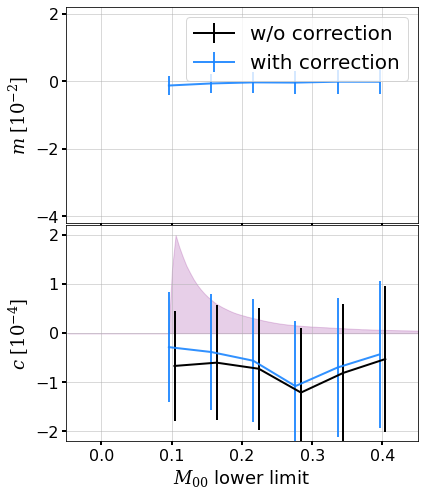

In [12]:
#del fs1,fs2
gc.collect()
use_sig=False
fs1=fpfs.base.Summary(mm1,ellM1,use_sig)
fs2=fpfs.base.Summary(mm2,ellM2,use_sig)

selnm=['detect','R2','M00']
dcc=0.06 # delta cut
cutB=0.1
cutsig=[0.006,0.02,0.02]

x=[]
y1=[];y2=[];yerr=[]
z1=[];z2=[];zerr=[]
for i in range(0,6):
    # clean outcome
    fs1.clear_outcomes()
    fs2.clear_outcomes()
    
    cut=cutB+dcc*i
    print(cut)
    cut=[0.002,cut/2.5,cut]
    # weight array
    fs1.update_selection_weight(selnm,cut,cutsig);fs2.update_selection_weight(selnm,cut,cutsig)
    fs1.update_selection_bias(selnm,cut,cutsig);fs2.update_selection_bias(selnm,cut,cutsig)
    fs1.update_ellsum();fs2.update_ellsum()
    de   = fs2.sumE1-fs1.sumE1
    eA   = (fs1.sumE1+fs2.sumE1)/2.
    eAR  = (fs1.sumE1+fs2.sumE1+fs1.corE1+fs2.corE1)/2.
    rave = (fs1.sumR1+fs2.sumR1)/2.
    raveR= (fs1.sumR1+fs2.sumR1+fs1.corR1+fs2.corR1)/2.
    x.append(cut[-1])
    y1.append(de/rave/0.04-1);y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR/0.04)
    z1.append(eA/rave);z2.append(eAR/rave)
    zerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR)
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$M_{00}$ lower limit';
ax.errorbar(np.array(x)+0.004,np.array(y1)*1e2,np.array(yerr)*1e2,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-0.004,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlim(-0.05,0.45)
ax.set_ylim(-4.2,2.2)
ax.tick_params(width=2,size=4)
hist,bins=np.histogram(fs1.mm['fpfs_M00'],range=(-0.05,0.46),bins=100,density=True)
cbin=(bins[1:]+bins[:-1])/2.
sf=hist.max()/2.
hist=hist/sf
ax.set_xticklabels([])
ax.grid()
ax.legend()

ax=axes[1]
ax.errorbar(np.array(x)+0.004,np.array(z1)*1e4,np.array(zerr)*1e4,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-0.004,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.05,0.45)
ax.set_ylim(-2.2,2.2)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()

plt.tight_layout(h_pad=-0.2)

-0.002
0.0
0.002
0.004
0.006
0.008
0.01
0.012


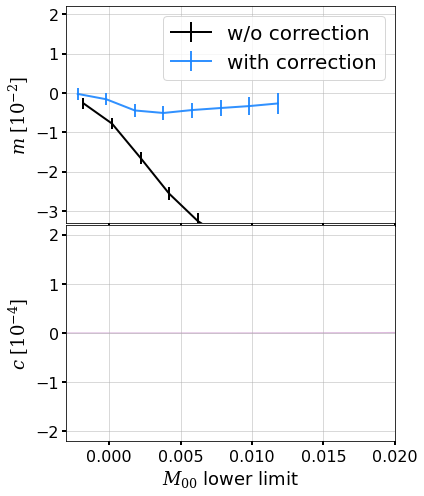

In [24]:
#del fs1,fs2
gc.collect()
use_sig=False
fs1=fpfs.base.Summary(mm1,ellM1,use_sig)
fs2=fpfs.base.Summary(mm2,ellM2,use_sig)

selnm=['detect']
dcc=0.002 # delta cut
cutB=-0.002

x=[]
y1=[];y2=[];yerr=[]
z1=[];z2=[];zerr=[]
for i in range(0,8):
    # clean outcome
    fs1.clear_outcomes()
    fs2.clear_outcomes()
    
    cut=cutB+dcc*i
    print(cut)
    cutsig=[min(max(cut/1.2,0.002),0.008)]
    cut=[cut]
    # weight array
    fs1.update_selection_weight(selnm,cut,cutsig);fs2.update_selection_weight(selnm,cut,cutsig)
    fs1.update_selection_bias(selnm,cut,cutsig);fs2.update_selection_bias(selnm,cut,cutsig)
    fs1.update_ellsum();fs2.update_ellsum()
    de   = fs2.sumE1-fs1.sumE1
    eA   = (fs1.sumE1+fs2.sumE1)/2.
    eAR  = (fs1.sumE1+fs2.sumE1+fs1.corE1+fs2.corE1)/2.
    rave = (fs1.sumR1+fs2.sumR1)/2.
    raveR= (fs1.sumR1+fs2.sumR1+(fs1.corR1+fs1.corR2)/2.+(fs2.corR1+fs2.corR2)/2.)/2.
    x.append(cut[-1])
    y1.append(de/rave/0.04-1);y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR/0.04)
    z1.append(eA/rave);z2.append(eAR/rave)
    zerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR)
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$M_{00}$ lower limit';
ax.errorbar(np.array(x)+2e-4,np.array(y1)*1e2,np.array(yerr)*1e2,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-2e-4,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)

ax.set_xlim(-0.003,0.02)
ax.set_ylim(-3.3,2.2)

ax.tick_params(width=2,size=4)
hist,bins=np.histogram(fs1.mm['fpfs_M00'],range=(-0.05,0.46),bins=100,density=True)
cbin=(bins[1:]+bins[:-1])/2.
sf=hist.max()/2.
hist=hist/sf
ax.set_xticklabels([])
ax.grid()
ax.legend()

ax=axes[1]
ax.errorbar(np.array(x)+2e-4,np.array(z1)*1e4,np.array(zerr)*1e4,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-2e-4,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.003,0.02)
ax.set_ylim(-2.2,2.2)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()

plt.tight_layout(h_pad=-0.2)

-0.002
0.0
0.002
0.004
0.006
0.008
0.01
0.012


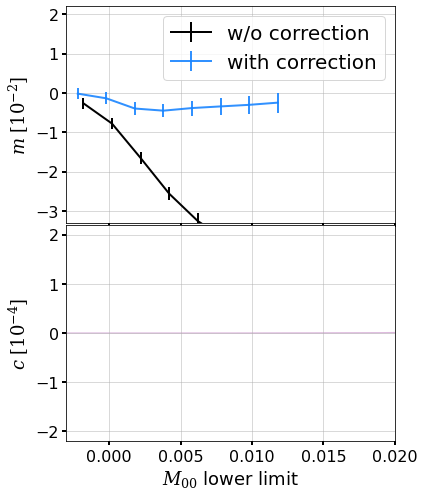

In [26]:
del fs1,fs2
gc.collect()
use_sig=False
fs1=fpfs.base.Summary(mm1,ellM1,use_sig)
fs2=fpfs.base.Summary(mm2,ellM2,use_sig)

selnm=['detect']
dcc=0.002 # delta cut
cutB=-0.002

x=[]
y1=[];y2=[];yerr=[]
z1=[];z2=[];zerr=[]
for i in range(0,8):
    # clean outcome
    fs1.clear_outcomes()
    fs2.clear_outcomes()
    
    cut=cutB+dcc*i
    print(cut)
    cutsig=[min(max(cut/1.2,0.002),0.008)]
    cut=[cut]
    # weight array
    fs1.update_selection_weight(selnm,cut,cutsig);fs2.update_selection_weight(selnm,cut,cutsig)
    fs1.update_selection_bias(selnm,cut,cutsig);fs2.update_selection_bias(selnm,cut,cutsig)
    fs1.update_ellsum();fs2.update_ellsum()
    de   = fs2.sumE1-fs1.sumE1
    eA   = (fs1.sumE1+fs2.sumE1)/2.
    eAR  = (fs1.sumE1+fs2.sumE1+fs1.corE1+fs2.corE1)/2.
    rave = (fs1.sumR1+fs2.sumR1)/2.
    raveR= (fs1.sumR1+fs2.sumR1+(fs1.corR1+fs1.corR2)/2.+(fs2.corR1+fs2.corR2)/2.)/2.
    x.append(cut[-1])
    y1.append(de/rave/0.04-1);y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR/0.04)
    z1.append(eA/rave);z2.append(eAR/rave)
    zerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR)
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$M_{00}$ lower limit';
ax.errorbar(np.array(x)+2e-4,np.array(y1)*1e2,np.array(yerr)*1e2,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-2e-4,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)

ax.set_xlim(-0.003,0.02)
ax.set_ylim(-3.3,2.2)

ax.tick_params(width=2,size=4)
hist,bins=np.histogram(fs1.mm['fpfs_M00'],range=(-0.05,0.46),bins=100,density=True)
cbin=(bins[1:]+bins[:-1])/2.
sf=hist.max()/2.
hist=hist/sf
ax.set_xticklabels([])
ax.grid()
ax.legend()

ax=axes[1]
ax.errorbar(np.array(x)+2e-4,np.array(z1)*1e4,np.array(zerr)*1e4,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-2e-4,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.003,0.02)
ax.set_ylim(-2.2,2.2)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()

plt.tight_layout(h_pad=-0.2)

-0.002
0.0
0.002
0.004
0.006
0.008
0.01
0.012


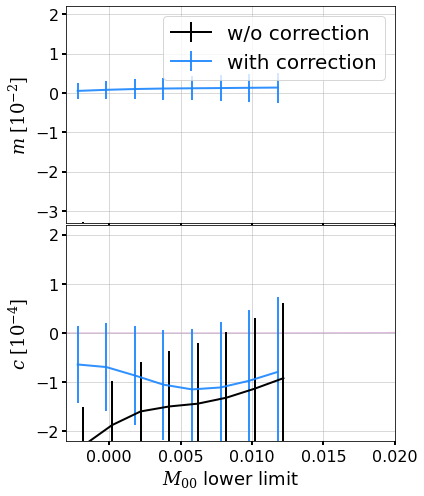

In [40]:
gc.collect()
use_sig=False
fs1=fpfs.base.Summary(mm1,ellM1,use_sig)
fs2=fpfs.base.Summary(mm2,ellM2,use_sig)

selnm=['detect']
dcc=0.002 # delta cut
cutB=-0.002

x=[]
y1=[];y2=[];yerr=[]
z1=[];z2=[];zerr=[]
for i in range(0,8):
    # clean outcome
    fs1.clear_outcomes()
    fs2.clear_outcomes()
    
    cut=cutB+dcc*i
    print(cut)
    cutsig=[0.012]
    cut=[cut]
    # weight array
    fs1.update_selection_weight(selnm,cut,cutsig);fs2.update_selection_weight(selnm,cut,cutsig)
    fs1.update_selection_bias(selnm,cut,cutsig);fs2.update_selection_bias(selnm,cut,cutsig)
    fs1.update_ellsum();fs2.update_ellsum()
    de   = fs2.sumE1-fs1.sumE1
    eA   = (fs1.sumE1+fs2.sumE1)/2.
    eAR  = (fs1.sumE1+fs2.sumE1+fs1.corE1+fs2.corE1)/2.
    rave = (fs1.sumR1+fs2.sumR1)/2.
    raveR= (fs1.sumR1+fs2.sumR1+fs1.corR1+fs2.corR1)/2.
    x.append(cut[-1])
    y1.append(de/rave/0.04-1);y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR/0.04)
    z1.append(eA/rave);z2.append(eAR/rave)
    zerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR)
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$M_{00}$ lower limit';
ax.errorbar(np.array(x)+2e-4,np.array(y1)*1e2,np.array(yerr)*1e2,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-2e-4,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)

ax.set_xlim(-0.003,0.02)
ax.set_ylim(-3.3,2.2)

ax.tick_params(width=2,size=4)
hist,bins=np.histogram(fs1.mm['fpfs_M00'],range=(-0.05,0.46),bins=100,density=True)
cbin=(bins[1:]+bins[:-1])/2.
sf=hist.max()/2.
hist=hist/sf
ax.set_xticklabels([])
ax.grid()
ax.legend()

ax=axes[1]
ax.errorbar(np.array(x)+2e-4,np.array(z1)*1e4,np.array(zerr)*1e4,label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)-2e-4,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[1])
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.003,0.02)
ax.set_ylim(-2.2,2.2)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()

plt.tight_layout(h_pad=-0.2)

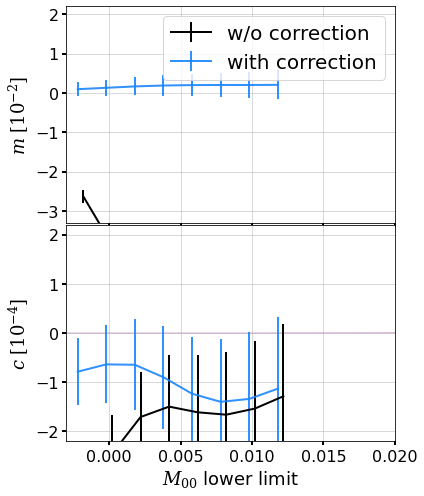

In [39]:
fig

0.0
0.06
0.12
0.18
0.24
0.3
0.36
0.42
[-0.00048325049875963533, -0.0008742366357099574, -0.0006842507249794627, -0.0002115384389973496, -6.781518696596933e-05, 4.064128639780229e-05, 0.00022036341628650646, 0.00015996349048341685]


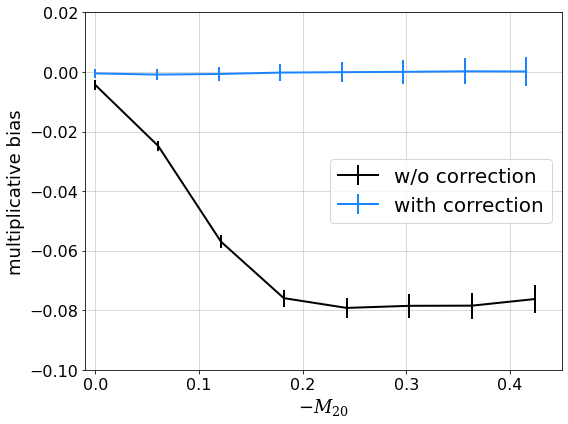

In [42]:
gc.collect()
plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]

xlabel='$-M_{20}$';selnm='fpfs_M20';cornm='fpfs_RS2';nornm='fpfs_HR20'
scol1=-mm1[selnm];scol2=-mm2[selnm]
ccol1=-ellM1[cornm];ccol2=-ellM2[cornm]
cncol1=-ellM1[nornm];cncol2=-ellM2[nornm]

ax.set_xlim(-0.01,0.45)

dcc=0.06 # delta cut
cutB=0.00 # 
cutsig=0.08
use_sig=False

fpSel=fpfs.base.Selection(mu=cutB,sigma=cutsig,use_sig=use_sig)

x=[]
y1=[]
y2=[]
yerr=[]
for i in range(0,8):
    # update cut array
    cut=cutB+dcc*i
    print(cut)
    fpSel.mu=cut
    # weight array
    ws1 = fpSel.get_wsel(scol1)
    ws2 = fpSel.get_wsel(scol2)
    cor1 = fpSel.get_wbias(scol1,ws1,ccol1)
    cor2 = fpSel.get_wbias(scol2,ws2,ccol2)
    corD1= fpSel.get_wbias(scol1,ws1,cncol1)
    corD2= fpSel.get_wbias(scol2,ws2,cncol2)
    de   = np.sum(ellM2['fpfs_e1']*ws2)-np.sum(ellM1['fpfs_e1']*ws1)
    rave = (np.sum(ellM2['fpfs_RE']*ws2)+np.sum(ellM1['fpfs_RE']*ws1))/2.
    raveR= (np.sum(ellM2['fpfs_RE']*ws2)+np.sum(ellM1['fpfs_RE']*ws1)+cor1+cor2+corD1+corD2)/2.
    x.append(cut);y1.append(de/rave/0.04-1);y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((ellM2['fpfs_RE']*ws2)**2.))/raveR/0.04)

ax.errorbar(np.array(x)*1.01,np.array(y1),np.array(yerr),label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)/1.01,np.array(y2),np.array(yerr),label='with correction',color=pltutil.colors[1])
ax.set_xlabel(xlabel)
ax.set_ylabel('multiplicative bias')
ax.set_ylim(-0.10,0.02)
ax.grid()
ax.legend()
plt.tight_layout()
#fig.savefig('../../html/noisy_knownRef_%s.png' %pn)
print(y2)

-0.005
0.005
0.015
0.024999999999999998
0.035
0.045000000000000005
0.055
0.065
[-0.00036692276142780145, -0.0031067806929659936, -0.0023562844479940726, -0.001222790496622217, -0.0008275882162808168, -0.00033071391090711, 0.000871819410424024, -0.0009530498104238783]


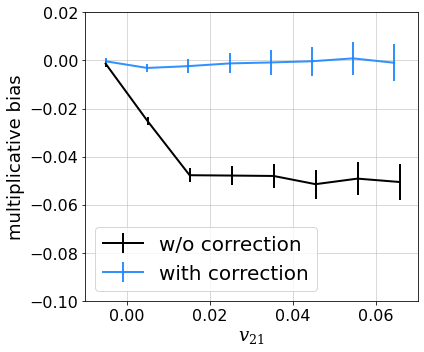

In [19]:
gc.collect()
selnm='fpfs_v32'
cornm='fpfs_RSv32'
scol1=det1[selnm]
scol2=det2[selnm]
ccol1=ellM1[cornm]
ccol2=ellM2[cornm]

dcc=0.01 # delta cut
cutB=-0.005 # 
cutsig=0.008
x=[];
y1=[];y2=[];yerr=[]
for i in range(0,8):
    # update cut array
    cut=cutB+dcc*i
    print(cut)
    ws1 = fpfs.catutil.get_wsel_eff(scol1,cut,cutsig,use_sig)
    ws2 = fpfs.catutil.get_wsel_eff(scol2,cut,cutsig,use_sig)
    cor1 = fpfs.catutil.get_wbias(scol1,cut,cutsig,use_sig,ws1,ccol1)
    cor2 = fpfs.catutil.get_wbias(scol2,cut,cutsig,use_sig,ws2,ccol2)
    de   = np.sum(ellM2['fpfs_e1']*ws2)-np.sum(ellM1['fpfs_e1']*ws1)
    rave = (np.sum(ellM2['fpfs_RE']*ws2)+np.sum(ellM1['fpfs_RE']*ws1))/2.
    raveR= (np.sum(ellM2['fpfs_RE']*ws2)+np.sum(ellM1['fpfs_RE']*ws1)+cor1+cor2)/2.
    x.append(cut)
    y1.append(de/rave/0.04-1)
    y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((ellM2['fpfs_RE']*ws2)**2.))/raveR/0.04)

plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
ax.errorbar(np.array(x)*1.01,np.array(y1),np.array(yerr),label='w/o correction',color=pltutil.colors[0])
ax.errorbar(np.array(x)/1.01,np.array(y2),np.array(yerr),label='with correction',color=pltutil.colors[1])
xlabel='$v_{21}$'
ax.set_xlabel(xlabel)
ax.set_ylabel('multiplicative bias')
ax.set_xlim(-0.01,0.07)
ax.set_ylim(-0.10,0.02)
ax.grid()
ax.legend()
plt.tight_layout()
#fig.savefig('../../html/noisy_knownRef_%s.png' %pn)
print(y2)

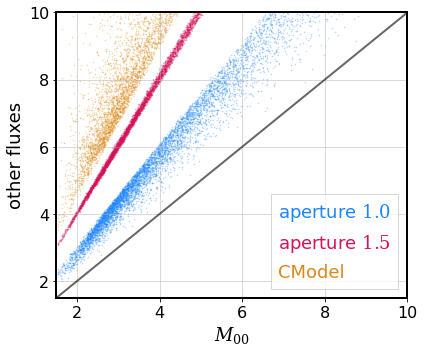

In [65]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally


nver='var1em9' # 'var0em0'# 'var1em9'
hdat=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/src-0000-g1-0000.fits' %(gver,nver,ver)))
fdat=fitsio.read(os.path.join(simDir,'srcfs3_%sCenter-%s_%s/psf60/fpfs-%s-0000-g1-0000.fits' %(gver,nver,ver,dver)))
hdat=hdat[hdat['parent']==0]
ipos1=np.int_((hdat['base_NaiveCentroid_y']//64*100)+hdat['base_NaiveCentroid_x']//64)
ipos2=np.int_((fdat['fpfs_y']//64*100)+fdat['fpfs_x']//64)
assert np.all(ipos2==np.arange(10000))
fdat=fdat[ipos1]


Const  =   0.01
edat=fpfs.catutil.fpfsM2E(fdat,const=Const,noirev=False)
size=0.3
alpha=0.3
rs=1.#2.5

plt.close()
fig,axes=pltutil.make_figure_axes(ny=1,nx=1,square=False)

ax=axes[0]
ax.scatter(fdat['fpfs_M00']/(0.168)**2.*rs,hdat['base_CircularApertureFlux_3_0_instFlux'],s=size,color=pltutil.colors0[1],alpha=alpha,label='aperture $1.0$')
ax.scatter(fdat['fpfs_M00']/(0.168)**2.*rs,hdat['base_CircularApertureFlux_4_5_instFlux'],s=size,color=pltutil.colors0[2],alpha=alpha,label='aperture $1.5$')
ax.scatter(fdat['fpfs_M00']/(0.168)**2.*rs,hdat['modelfit_CModel_instFlux'],s=size,color=pltutil.colors0[3],alpha=alpha,label='CModel')
x=np.linspace(0,20,100)
ax.plot(x,x,'-',color='black',alpha=0.6)
ax.set_xlabel('$M_{00}$')
ax.set_ylabel('other fluxes')
ax.set_xlim(1.5,10)
ax.set_ylim(1.5,10)
ax.grid()

leg=ax.legend(fontsize=18,handlelength=0,handletextpad=0,fancybox=False,markerscale=0)
for it,text in enumerate(leg.get_texts()):
    text.set_color(pltutil.colors0[it+1])

#ax=axes[1]
#ax.scatter((fdat['fpfs_M00']+fdat['fpfs_M20'])/0.168**2.,hdat['ext_shapeHSM_HsmSourceMoments_xx']+hdat['ext_shapeHSM_HsmSourceMoments_yy'],\
#           s=0.04,color=pltutil.colors[1],alpha=0.1)
#ax.set_xlabel('fpfs trace')
#ax.set_ylabel('regauss trace')
#ax.set_xlim(-1,40)
#ax.set_ylim(-1,40)
fig.tight_layout()
fig.savefig('compare_fluxes.pdf')

2774

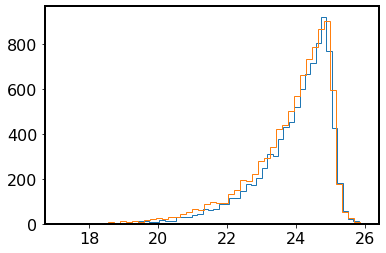

In [79]:
plt.close()
m1   =   -2.5 * np.log10(fdat['fpfs_M00']/(0.168)**2.*2.5) + 27.
plt.hist(m1,bins=50,histtype='step')
m1   =   -2.5 * np.log10(hdat['modelfit_CModel_instFlux']) + 27.
plt.hist(m1,bins=50,histtype='step')
gc.collect()

In [81]:
-2.5 * np.log10(2.5)

-0.994850021680094

In [80]:
10**((24.5- 27.)/(-2.5))*(0.168)**2./2.5

0.11289600000000002